<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica5_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Pablo Calderon
*   Jean Tovar
*   Jesus Solano
*   Arturo Goméz


----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación. 
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso. 

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras. P

ara ganar, el jugador debe sacar el mismo número en ambos dados. 

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades). 

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana. 

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [ ]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randinit()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [ ]:
dado1 = random.randint(1,6)
dado1

1

In [ ]:
# Creando funcion de lanzamiento de dados
def roll_dice():

    dado1 = random.randint(1,6)
    dado2 = random.randint(1,6)
    if dado1 ==dado2: 
      same_num=True
    else:
      same_num=False
    #print(dado1)
    #print(dado2)

    return same_num

In [ ]:
roll_dice()

True

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener. 

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**. 

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar. 

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

El saldo final es: 1360
La probabilidad de ganar es: 0.18


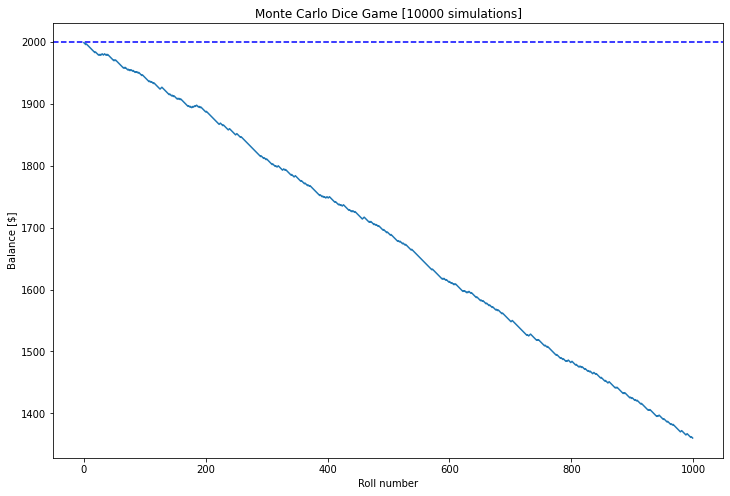

In [ ]:
# Entradas
num_simulations = 10000 #Valor dado
max_num_rolls = 1000
bet = 1

# Seguimiento
total_money=2000
num_of_plays = []
money = []
play = 1
wins=0

for play in range(max_num_rolls):
        #Victoria
        if roll_dice():
            #Sumar lo ganado
            total_money = total_money + bet
            #agregar valores al arreglo de veces jugadas
            num_of_plays.append(play)
            #agregar lo ganado
            money.append(total_money)
            wins=wins+1

        #Perdida
        else:
            #restar lo perdido
            total_money = total_money - bet
            #agregar valores al arreglo de veces jugadas
            num_of_plays.append(play)
            #agregar lo ganado
            money.append(total_money)

plt.figure(figsize=(12,8))
plt.title('Monte Carlo Dice Game [10000 simulations]')
plt.ylabel("Balance [$]")
plt.xlabel("Roll number")
plt.plot(num_of_plays, money)
plt.axhline(y=2000, color='b', linestyle='--')
#plt.xlim(100,800)

win_probability = wins/max_num_rolls
end_balance = money[-1]
print("El saldo final es:", end_balance)
print("La probabilidad de ganar es:", win_probability)



### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados.

In [ ]:
#LA figura se configuro arriba
# Creando figura para los ejemplos de simulacion
#fig = #<COMPLETA>
#plt.#<COMPLETA>
#plt.#<COMPLETA>
#plt.#<COMPLETA>
#plt.xlim(#<COMPLETA>)

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas). 

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos. 

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

In [ ]:
# For para ejecutar todas las simulaciones deseadas
#for i in range(#<COMPLETA>):
#   balance = #<COMPLETA>
#    num_rolls = #<COMPLETA>
#    num_wins = #<COMPLETA>
#    
#    while num_rolls[-1] < max_num_rolls:
#        #<COMPLETA>     
#
#        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
#    win_probability.#<COMPLETA>
#    end_balance.#<COMPLETA>
#   plt.plot(#<COMPLETA>)
# Configurado abajo

In [ ]:
# Entradas
num_simulations = 10000 #Valor dado
end_balance=[]
def play(total_money,bet,max_num_rolls):
  # Seguimiento
  num_of_plays = []
  money = []
  play = 1
  wins=0
  

  for play in range(max_num_rolls):
         
    if roll_dice():
      #Sumar lo ganado
      total_money = total_money + bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)
      wins=wins+1

          
    else:
      #restar lo perdido
      total_money = total_money - bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)

  #plt.figure(figsize=(12,8))
  plt.title('Monte Carlo Dice Game [' + str(num_simulations) + ' ' + 'simulations]')
  plt.ylabel("Balance [$]")
  plt.xlabel("Roll number")
  plt.plot(num_of_plays, money)
  
    
    

  win_probability = wins/max_num_rolls
  end_balance.append(money[-1])

  return(end_balance,win_probability)



Saldo final es: [324]
probabilidad de ganar: 0.162


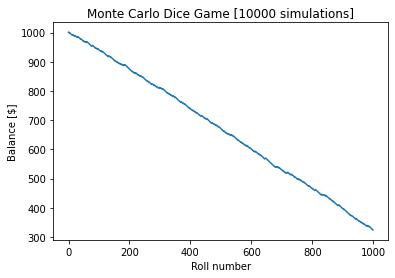

In [ ]:
a,b = play(1000,1,1000)
print("Saldo final es:", a)
print('probabilidad de ganar:', b)

Promedio de victorias despues de 10000 simulaciones: 0.16678129999999958
Saldo promedio despues de 10000 simulaciones: $333.5626


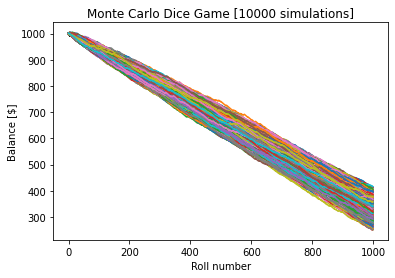

In [ ]:
end_balance = []
win_probs =[]
num_simulations=10000
for i in range(num_simulations):
    x=play(1000,1,1000)
    ending_fund = x[0]
    win_probs.append(x[1])

#print(ending_fund)
#print(win_probs)

overall_win_probability = sum(win_probs)/len(win_probs)
overall_end_balance = sum(ending_fund)/len(end_balance)
 

print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

#print("El overall end balance es:", sum(ending_fund)/len(end_balance))
#print("El overall win probability es:",sum(win_probs)/len(win_probs))



## Desafio complementario

Ahora, realiza el mismo procedimiento pero mostrando los 
resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.

Como bien sabemos, cada que gana el individuo, la casa le pagaba 4 veces el valor de la apuesta.
Ahora, si gana, le pagaran 6 veces mas de lo apostado, siempre y cuando el individuo apueste de 3 en 3.

El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario?
¿En cuales se tiene un porcentaje mayor de victoria? 

Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos. 

## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [ ]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)

In [ ]:
url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

In [ ]:
req = requests.get(url)
response = req.content
#deberia salir Response[200]

In [ ]:
# IMDB's homepage
flipkart_url = "https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY."

# Usamos requests para obtener los datos de la URL dada
flipkart_response = requests.get(flipkart_url)



### Paso 2: inspección de la página

Los datos suelen estar anidados en etiquetas. Entonces, inspeccionamos la página para ver, bajo qué etiqueta están anidados los datos que queremos raspar. Para inspeccionar la página, simplemente haga clic derecho en el elemento y haga clic en "Inspeccionar" (o F12).

![img](https://miro.medium.com/max/571/0*TF2VBxPanqhxb-hY.png)

### Paso 3: busque los datos que desea extraer

Extraemos el nombre, precio y calificación que están anidados en la etiqueta "div" respectivamente.

Por lo general, nos confundiremos sobre qué etiqueta necesitamos copiar para esta computadora portátil. Podemos usar https://webformatter.com/ para filtrar la etiqueta por el nombre, el precio y la calificación, y podemos copiar fácilmente con esta herramienta.

Ahora que hemos escrito el código para abrir la URL, es hora de extraer los datos del sitio web. Como se mencionó anteriormente, los datos que queremos extraer están anidados en etiquetas <div>. Entonces, encontraremos las etiquetas div con esos respectivos nombres de clase, extraeremos y almacenaremos los datos en una variable. Consulte el código a continuación:

In [ ]:
soup = BeautifulSoup(#<COMPLETA>)

SyntaxError: ignored

In [ ]:
# Transformamos todo el codigo HTML usando beautiful soup
flipkart_soup = BeautifulSoup(flipkart_response.text, 'html.parser')

# Titulo de la pagina transformada
flipkart_soup.title

<title>Laptops- Buy Products Online at Best Price in India - All Categories | Flipkart.com</title>

In [ ]:
#<COMPLETA>.find_all("div", {"class":"_13oc-S"})
#<COMPLETA>

In [ ]:
class_= flipkart_soup.find_all(name="div", attrs={"class":"_13oc-S"})
main_box= class_

In [ ]:
box=main_box[0]
box
#practica

<div class="_13oc-S"><div data-id="COMGKW2NUQJFVKSC" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&amp;lid=LSTCOMGKW2NUQJFVKSCIUU2X8&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_WS9Cbhc4EWll2E4g19TlRjAR2%2F1yCj5sVZA5KjTq6P985GeBLBudpA20GJkwIwThaRqZmzLO%2Fztj73jFckhaqA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=1w57ueeb7k0000001677804706280&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/6/p/a/chromeb

In [ ]:
box=main_box[0]
box
#nuestro codigo

<div class="_13oc-S"><div data-id="COMGKW2NUQJFVKSC" style="width:100%"><div class="_2kHMtA"><div class="_2tfzpE"><span>Ad</span></div><a class="_1fQZEK" href="/hp-intel-celeron-dual-core-4-gb-64-gb-emmc-storage-chrome-os-14a-na1004tu-chromebook/p/itm0c05997839997?pid=COMGKW2NUQJFVKSC&amp;lid=LSTCOMGKW2NUQJFVKSCIUU2X8&amp;marketplace=FLIPKART&amp;q=laptops&amp;store=6bo%2Fb5g&amp;srno=s_1_1&amp;otracker=search&amp;otracker1=search&amp;fm=organic&amp;iid=en_WS9Cbhc4EWll2E4g19TlRjAR2%2F1yCj5sVZA5KjTq6P985GeBLBudpA20GJkwIwThaRqZmzLO%2Fztj73jFckhaqA%3D%3D&amp;ppt=None&amp;ppn=None&amp;ssid=1w57ueeb7k0000001677804706280&amp;qH=c06ea84a1e3dc3c6" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/6/p/a/chromeb

In [ ]:
title = box.find('div', {'class':'_4rR01T'}).text.strip()
rating = box.find('div', {'class':'_3LWZlK'}).text.strip()
price = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.replace('₹','').strip()

In [ ]:
print(title,price,rating) #practica

HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook 21,800 3.8


In [ ]:
print(title,price,rating) #nuestro codigo

HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook 21,800 3.8


In [ ]:
data_list=[]
for box in main_box:
    temp_dict={}
    if not box.find('div', {'class':'_3LWZlK'}):
        temp_dict['rating'] = "unknown"
    else:
        temp_dict['rating'] = box.find('div', {'class':'_3LWZlK'}).text.strip()  
    #<COMPLETA>
    data_list.append(temp_dict)

In [ ]:
data_list=[]
for box in main_box:
    temp_dict={}
    #title
    if not box.find('div', {'class':'_4rR01T'}):
        temp_dict['title'] = "unknown"
    else:
        temp_dict['title'] = box.find('div', {'class':'_4rR01T'}).text.strip()

    #price
    if not box.find('div', {'class':'_30jeq3 _1_WHN1'}):
        temp_dict['price'] = "unknown"
    else:
        temp_dict['price'] = box.find('div', {'class':'_30jeq3 _1_WHN1'}).text.strip()[1:]
        

    #rating
    if not box.find('div', {'class':'_3LWZlK'}):
        temp_dict['rating'] = "unknown"
    else:
        temp_dict['rating'] = box.find('div', {'class':'_3LWZlK'}).text.strip()
                  
    
    data_list.append(temp_dict)

In [ ]:
data_list #practica

[{'title': 'ASUS Vivobook 15 OLED (2022) Core i5 12th Gen - (16 GB/512 GB SSD/Windows 11 Home) X1505ZA-L1511WS Thi...',
  'price': '66,990',
  'rating': '4.6'},
 {'title': 'Lenovo Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 81X800J3IN | 8...',
  'price': '39,990',
  'rating': '4.3'},
 {'title': 'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...',
  'price': '49,990',
  'rating': '4.4'},
 {'title': 'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...',
  'price': '32,990',
  'rating': '4.3'},
 {'title': 'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop',
  'price': '35,490',
  'rating': '4.2'},
 {'title': 'ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L...',
  'price': '21,990',
  'rating': '4.1'},
 {'title': 'Lenovo Athlon Dual Core -

In [ ]:
data_list #codigo nuestro

[{'title': 'HP intel Celeron Dual Core - (4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004TU Chromebook',
  'price': '21,800',
  'rating': '3.8'},
 {'title': 'HP 14s Intel Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508TU Thin and Light Laptop',
  'price': '39,900',
  'rating': '4.2'},
 {'title': 'ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...',
  'price': '49,990',
  'rating': '4.4'},
 {'title': 'ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...',
  'price': '32,990',
  'rating': '4.3'},
 {'title': 'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop',
  'price': '35,490',
  'rating': '4.2'},
 {'title': 'ASUS VivoBook 14 (2021) Celeron Dual Core - (4 GB/256 GB SSD/Windows 11 Home) X415MA-BV011W Thin and L...',
  'price': '21,990',
  'rating': '4.1'},
 {'title': 'Lenovo Athlon Dual Core - (4 GB/256 GB SSD/D

### Paso 4: Crear un dataframe y guardar los datos en csv

Después de extraer los datos, es posible que desee almacenarlos en un formato. Este formato varía según sus necesidades. Para este ejemplo, almacenaremos los datos extraídos en formato CSV (valores separados por comas). Para hacer esto, agregaré las siguientes líneas a mi código:

In [ ]:
#<COMPLETA>

In [ ]:
import pandas as pd
df=pd.DataFrame(data_list, columns=['title','price','rating'])
df

,title,price,rating
0,HP intel Celeron Dual Core - (4 GB/64 GB EMMC ...,"21,800",3.8
1,HP 14s Intel Core i3 11th Gen - (8 GB/512 GB S...,"39,900",4.2
2,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,"49,990",4.4
3,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"32,990",4.3
4,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,"35,490",4.2
5,ASUS VivoBook 14 (2021) Celeron Dual Core - (4...,"21,990",4.1
6,Lenovo Athlon Dual Core - (4 GB/256 GB SSD/DOS...,"18,990",3.9
7,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...,"44,800",4.3
8,HP 15s Intel Core i3 11th Gen - (8 GB/512 GB S...,"40,450",4.3
9,HP Ryzen 5 Hexa Core 5500U - (16 GB/512 GB SSD...,"49,990",4.3


In [ ]:
csv_data=df.to_csv("flipkart_df.csv")


### Paso 5: Un poco de EDA y visualización de este archivo

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   24 non-null     object
 1   price   24 non-null     object
 2   rating  24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


In [ ]:
laptop_df=df.copy()
#<COMPLETA> | Crea una copia auxiliar llamada laptop_df

In [ ]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   24 non-null     object
 1   price   24 non-null     object
 2   rating  24 non-null     object
dtypes: object(3)
memory usage: 704.0+ bytes


Quiero dividir el título debido a todas las especificaciones y nombres de portátiles en una fila.

Lo dividiremos en diferentes columnas por separado usando la opción split ()

In [ ]:
prices = float(laptop_df['price'].strip().lstrip(","))

AttributeError: ignored

In [ ]:
laptop_df['price'].float()
laptop_df['rating'].float()

#convertir la columna a flotante

NameError: ignored

In [ ]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()
#practica

C:\Users\beyon\AppData\Local\Temp\ipykernel_16568\2258798354.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str


,rating,price,model,spec
0,4.2,"59,999",HP 15s Intel Core i5 12th Gen,(8 GB/512 GB SSD/Windows 11 Home) 15s-fq5111T...
1,4.2,"37,990",HP 14s Intel Core i3 11th Gen,(8 GB/256 GB SSD/Windows 11 Home) 14s - dy250...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
3,4.7,"86,990",APPLE 2020 Macbook Air M1,(8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A
4,4.3,"33,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,(8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ36...


Usamos esta opción dividida (split "-") para separar del título y crear una columna separada como modelo y especificación y eliminar el título

In [ ]:
laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str
del laptop_df['title']
laptop_df.head()
#codigo

<ipython-input-70-b1d94d5b63a7>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['model'], laptop_df['spec'] = laptop_df['title'].str.split('-', 1).str


,price,rating,model,spec
0,"21,800",3.8,HP intel Celeron Dual Core,(4 GB/64 GB EMMC Storage/Chrome OS) 14a- na10...
1,"39,900",4.2,HP 14s Intel Core i3 11th Gen,(8 GB/512 GB SSD/Windows 11 Home) 14s - dy250...
2,"49,990",4.4,ASUS TUF Gaming F15 Core i5 10th Gen,(8 GB/512 GB SSD/Windows 11 Home/4 GB Graphic...
3,"32,990",4.3,ASUS VivoBook 15 (2022) Core i3 10th Gen,(8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ36...
4,"35,490",4.2,HP 14s Intel Core i3 11th Gen,(8 GB/256 GB SSD/Windows 11 Home) 14s - dy250...


In [ ]:
#<COMPLETA> sacamos columna nueva llamada RAM

C:\Users\beyon\AppData\Local\Temp\ipykernel_16568\1151749628.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['HDD'] = laptop_df['spec'].str.split('(', 1).str


,rating,price,model,RAM,HDD
0,4.2,"59,999",HP 15s Intel Core i5 12th Gen,,8 GB/512 GB SSD/Windows 11 Home) 15s-fq5111TU ...
1,4.2,"37,990",HP 14s Intel Core i3 11th Gen,,8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507T...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,,8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/...
3,4.7,"86,990",APPLE 2020 Macbook Air M1,,8 GB/256 GB SSD/Mac OS Big Sur) MGN63HN/A
4,4.3,"33,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,,8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362W...


In [ ]:
laptop_df['RAM'], laptop_df['specs'] = laptop_df['spec'].str.split('(', 1).str
del laptop_df['spec']
laptop_df.head()

<ipython-input-71-44f07eb9f0ac>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['specs'] = laptop_df['spec'].str.split('(', 1).str


,price,rating,model,RAM,specs
0,"21,800",3.8,HP intel Celeron Dual Core,,4 GB/64 GB EMMC Storage/Chrome OS) 14a- na1004...
1,"39,900",4.2,HP 14s Intel Core i3 11th Gen,,8 GB/512 GB SSD/Windows 11 Home) 14s - dy2508T...
2,"49,990",4.4,ASUS TUF Gaming F15 Core i5 10th Gen,,8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/...
3,"32,990",4.3,ASUS VivoBook 15 (2022) Core i3 10th Gen,,8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362W...
4,"35,490",4.2,HP 14s Intel Core i3 11th Gen,,8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507T...


In [ ]:
#<COMPLETA>

C:\Users\beyon\AppData\Local\Temp\ipykernel_16568\4028741044.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['Hard disk'] = laptop_df['HDD'].str.split('/', 1).str


,rating,price,model,RAM,Hard disk
0,4.2,"59,999",HP 15s Intel Core i5 12th Gen,8 GB,512 GB SSD/Windows 11 Home) 15s-fq5111TU Thin ...
1,4.2,"37,990",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD/Windows 11 Home) 14s - dy2507TU Thi...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
3,4.7,"86,990",APPLE 2020 Macbook Air M1,8 GB,256 GB SSD/Mac OS Big Sur) MGN63HN/A
4,4.3,"33,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X...


In [ ]:
laptop_df['RAM'], laptop_df['HDD'] = laptop_df['specs'].str.split('/', 1).str
del laptop_df['specs']
laptop_df.head()

<ipython-input-72-8c6c78a12759>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['RAM'], laptop_df['HDD'] = laptop_df['specs'].str.split('/', 1).str


,price,rating,model,RAM,HDD
0,"21,800",3.8,HP intel Celeron Dual Core,4 GB,64 GB EMMC Storage/Chrome OS) 14a- na1004TU Ch...
1,"39,900",4.2,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD/Windows 11 Home) 14s - dy2508TU Thi...
2,"49,990",4.4,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD/Windows 11 Home/4 GB Graphics/NVIDI...
3,"32,990",4.3,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X...
4,"35,490",4.2,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD/Windows 11 Home) 14s - dy2507TU Thi...


Continuemos hasta conseguir lo siguiente...

In [ ]:
laptop_df['Storage'], laptop_df['OS'] = laptop_df['HDD'].str.split('/', 1).str
del laptop_df['HDD']
laptop_df.head()

,price,rating,model,RAM,Storage,OS,Model
0,"21,800",3.8,HP intel Celeron Dual Core,4 GB,64 GB EMMC Storage,Chrome OS,14a- na1004TU Chromebook
1,"39,900",4.2,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,14s - dy2508TU Thin and Light Laptop
2,"49,990",4.4,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,"32,990",4.3,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
4,"35,490",4.2,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop


In [ ]:
laptop_df.head()
#laptop_df['Model']=laptop_df['Other_Info']

,price,rating,model,RAM,Storage,OS,Model
0,"21,800",3.8,HP intel Celeron Dual Core,4 GB,64 GB EMMC Storage,Chrome OS,14a- na1004TU Chromebook
1,"39,900",4.2,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,14s - dy2508TU Thin and Light Laptop
2,"49,990",4.4,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,"32,990",4.3,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
4,"35,490",4.2,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop


In [ ]:
#<COMPLETA>

C:\Users\beyon\AppData\Local\Temp\ipykernel_16568\4099446987.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['Storage'], laptop_df['OS'] = laptop_df['Hard disk'].str.split('/', 1).str


,rating,price,model,RAM,Storage,OS
0,4.2,"59,999",HP 15s Intel Core i5 12th Gen,8 GB,512 GB SSD,Windows 11 Home) 15s-fq5111TU Thin and Light L...
1,4.2,"37,990",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home) 14s - dy2507TU Thin and Light...
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...
3,4.7,"86,990",APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur) MGN63HN/A
4,4.3,"33,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home) X515JA-EJ362WS | X515JA-E...


In [ ]:
#<COMPLETA>

C:\Users\beyon\AppData\Local\Temp\ipykernel_16568\1256590561.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  laptop_df['System'], laptop_df['Other_Info'] = laptop_df['OS'].str.split(')', 1).str


,rating,price,model,RAM,Storage,System,Other_Info
0,4.2,"59,999",HP 15s Intel Core i5 12th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq5111TU Thin and Light Laptop
1,4.2,"37,990",HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
2,4.4,"49,990",ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
3,4.7,"86,990",APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
4,4.3,"33,990",ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...


### Paso 6: Identificación de valores perdidos

Los métodos isnull () y notnull () son las formas más comunes de identificar valores perdidos.

Mientras maneja los datos faltantes, primero debe identificar las filas y columnas que contienen los valores faltantes, contar el número de valores faltantes y luego decidir cómo desea tratarlos.

Es importante que trate los valores faltantes en cada columna por separado, en lugar de implementar una única solución (por ejemplo, reemplazar los NaN por la media de una columna) para todas las columnas.

isnull () devuelve un valor booleano (Verdadero / Falso) que luego se puede usar para encontrar las filas o columnas que contienen valores perdidos.

In [ ]:
#<COMPLETA>

,rating,price,model,RAM,Storage,System,Other_Info
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [ ]:
laptop_df.isnull()

,price,rating,model,RAM,Storage,OS,Model
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


### Identificación de valores perdidos en columnas

Primero calculemos el número total de valores faltantes en el marco de datos. Puede calcular el número de valores perdidos en cada columna mediante df.isnull().Sum()

In [ ]:
#<COMPLETA>

rating        0
price         0
model         0
RAM           0
Storage       0
System        0
Other_Info    2
dtype: int64

In [ ]:
laptop_df.isnull().sum()

price      0
rating     0
model      0
RAM        0
Storage    0
OS         0
Model      4
dtype: int64

In [ ]:
#<COMPLETA>

22

In [ ]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    24 non-null     object
 1   rating   24 non-null     object
 2   model    24 non-null     object
 3   RAM      24 non-null     object
 4   Storage  24 non-null     object
 5   OS       24 non-null     object
 6   Model    20 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB


In [ ]:
#<COMPLETA>

HP Ryzen 5 Hexa Core 5500U                                         2
APPLE 2020 Macbook Air M1                                          2
HP 15s Intel Core i5 12th Gen                                      1
Lenovo IdeaPad 3 Core i3 11th Gen                                  1
acer Aspire 3 Ryzen 3 Dual Core 3250U                              1
HP Pavilion Ryzen 5 Hexa Core 5625U                                1
HP 15s Intel Core i3 11th Gen                                      1
realme Book (Slim) Core i3 11th Gen                                1
ASUS Core i7 11th Gen                                              1
DELL Vostro Core i3 11th Gen                                       1
HP Intel Core i5 11th Gen                                          1
HP Laptop Core i3 11th Gen                                         1
HP 14s Intel Core i3 11th Gen                                      1
ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5 Hexa Core AMD R5    1
ASUS VivoBook 14 (2021) Celeron Du

In [ ]:
laptop_df['model'].value_counts()

HP 14s Intel Core i3 11th Gen                                      2
HP intel Celeron Dual Core                                         1
acer Aspire 3 Ryzen 3 Dual Core 3250U                              1
HP 15s Intel Core i5 12th Gen                                      1
RedmiBook Pro Core i5 11th Gen                                     1
HP Intel Core i5 11th Gen                                          1
ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5 Hexa Core AMD R5    1
ASUS Vivobook 15 Core i3 11th Gen                                  1
APPLE 2020 Macbook Air M1                                          1
ASUS Core i5 11th Gen                                              1
Lenovo IdeaPad Core i5 11th Gen                                    1
HP 15s Intel Core i3 12th Gen                                      1
DELL Vostro Core i3 11th Gen                                       1
Lenovo Lenovo IdeaPad Slim 3 Intel Core i5 11th Gen                1
DELL Vostro Core i3 10th Gen      

In [ ]:
#<COMPLETA>

,rating,price,model,RAM,Storage,System,Other_Info
count,24,24,24,24,24,24,22
unique,8,22,22,3,3,7,22
top,4.2,"39,990",HP Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 11 Home,15s-fq5111TU Thin and Light Laptop
freq,7,2,2,19,16,17,1


In [ ]:
laptop_df.describe()

,price,rating,model,RAM,Storage,OS,Model
count,24,24,24,24,24,24,20
unique,22,10,23,3,4,9,20
top,"49,990",4.3,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,14a- na1004TU Chromebook
freq,3,6,2,19,17,15,1


In [ ]:
#<COMPLETA>

rating        object
price         object
model         object
RAM           object
Storage       object
System        object
Other_Info    object
dtype: object

In [ ]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    24 non-null     object
 1   rating   24 non-null     object
 2   model    24 non-null     object
 3   RAM      24 non-null     object
 4   Storage  24 non-null     object
 5   OS       24 non-null     object
 6   Model    20 non-null     object
dtypes: object(7)
memory usage: 1.4+ KB


Modifiquemos la columna de precio y rating para que sean de tipo numerico

In [ ]:
#<COMPLETA>

In [ ]:
#<COMPLETA>

,rating,price
count,24.000000,24.000000
mean,4.075000,46957.916667
std,0.887228,16899.183834
min,0.000000,18990.000000
25%,4.100000,37740.000000
50%,4.200000,42970.000000
75%,4.300000,54740.000000
max,4.700000,86990.000000


In [ ]:
f=lambda x:x.replace(",","")
laptop_df['price']=pd.to_numeric(laptop_df['price'].apply(f))
laptop_df['rating']=pd.to_numeric(laptop_df['rating'])




In [ ]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    24 non-null     int64  
 1   rating   24 non-null     float64
 2   model    24 non-null     object 
 3   RAM      24 non-null     object 
 4   Storage  24 non-null     object 
 5   OS       24 non-null     object 
 6   Model    20 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ KB


In [ ]:
#<COMPLETA>

rating        float64
price         float64
model          object
RAM            object
Storage        object
System         object
Other_Info     object
dtype: object

Ahora necesitamos filtrar las mejores computadoras portátiles con buenas especificaciones, precio y calificación de la lista.

Muestra los siguientes resultados:
 * Laptops en rating <= 4
 * Laptops con rating >= 3.5 y un precio entre 30 y 40 mil $

In [ ]:
#<COMPLETA>

,rating,price,model,RAM,Storage,System,Other_Info
5,3.9,18990.0,Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS,E41-55 45-2 Laptop
8,4.0,33999.0,Lenovo V15 G2 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,V15 ITL G2 Laptop
11,0.0,39990.0,HP Laptop Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq2717TU Thin and Light Laptop


In [ ]:
laptop_df[laptop_df['rating']<=4]

,price,rating,model,RAM,Storage,OS,Model
0,21800,3.8,HP intel Celeron Dual Core,4 GB,64 GB EMMC Storage,Chrome OS,14a- na1004TU Chromebook
6,18990,3.9,Lenovo Athlon Dual Core,4 GB,256 GB SSD,DOS,E41-55 45-2 Laptop
12,37990,4.0,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...


In [ ]:
#<COMPLETA>

,rating,price,model,RAM,Storage,System,Other_Info
1,4.2,37990.0,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
4,4.3,33990.0,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
6,4.1,38990.0,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,Thin and Light Laptop
8,4.0,33999.0,Lenovo V15 G2 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,V15 ITL G2 Laptop
16,4.1,39990.0,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
18,4.4,36990.0,realme Book (Slim) Core i3 11th Gen,8 GB,256 GB SSD,Windows 10 Home,RMNB1001 Thin and Light Laptop
22,4.3,38699.0,Lenovo IdeaPad 3 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,82H801L7IN | 82H802FJIN | 82H802...


In [ ]:
laptop_df.isnull().sum()

price      0
rating     0
model      0
RAM        0
Storage    0
OS         0
Model      4
dtype: int64

In [ ]:
x1=laptop_df[laptop_df[laptop_df['rating']>=3.5]["price"]>30000]
x2=x1[x1['price']<45000]
x2
          
      

,price,rating,model,RAM,Storage,OS,Model
1,39900,4.2,HP 14s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,14s - dy2508TU Thin and Light Laptop
3,32990,4.3,ASUS VivoBook 15 (2022) Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,X515JA-EJ362WS | X515JA-E...
4,35490,4.2,HP 14s Intel Core i3 11th Gen,8 GB,256 GB SSD,Windows 11 Home,14s - dy2507TU Thin and Light Laptop
7,44800,4.3,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U,8 GB,512 GB SSD,Windows 11 Home,15ALC6 Thin and Light Lap...
8,40450,4.3,HP 15s Intel Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fr2511TU Thin and Light Laptop
10,36990,4.1,DELL Vostro Core i3 10th Gen,8 GB,512 GB SSD,Windows 11 Home,Vostro 3510 Thin and Light Laptop
12,37990,4.0,DELL Vostro Core i3 11th Gen,8 GB,1 TB HDD,256 GB SSD/Windows 11 Home,Vostro 3510 Thin and Light L...
14,43990,4.2,HP 15s Intel Core i3 12th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq5007TU Thin and Light Laptop
18,35990,4.1,ASUS Vivobook 15 Core i3 11th Gen,8 GB,512 GB SSD,Windows 11 Home,X515EA-EJ322WS Thin and Light La...
21,38990,4.1,RedmiBook Pro Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,Thin and Light Laptop


---------

### Visualización de los datos

In [ ]:
#<COMPLETA>

Realizaremos una gráfica de barras de precio vs rating

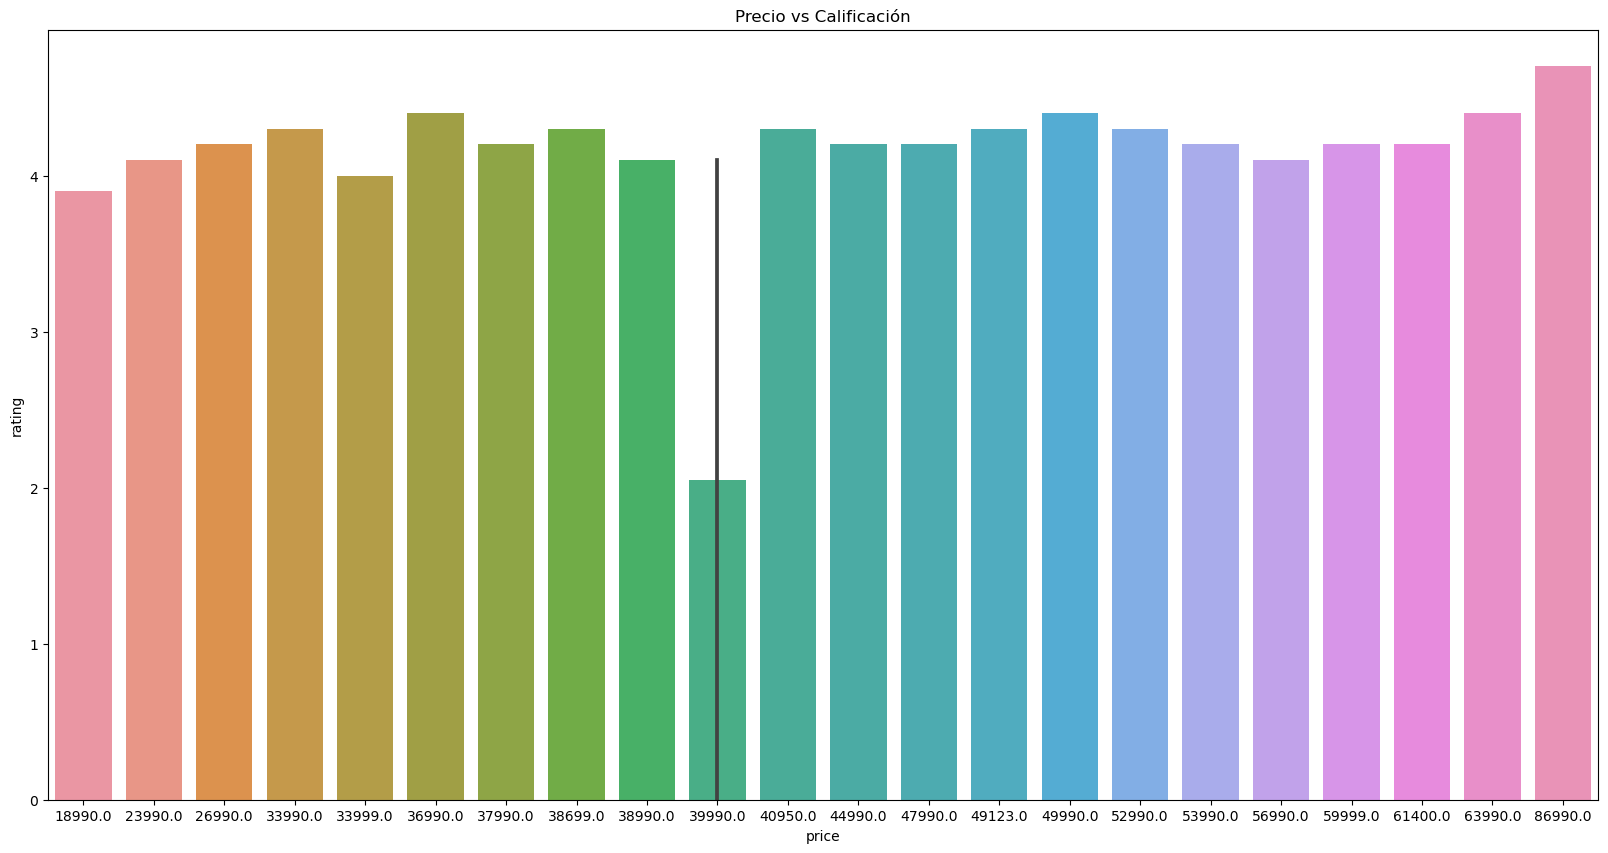

In [ ]:
#<COMPLETA>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price', ylabel='rating'>

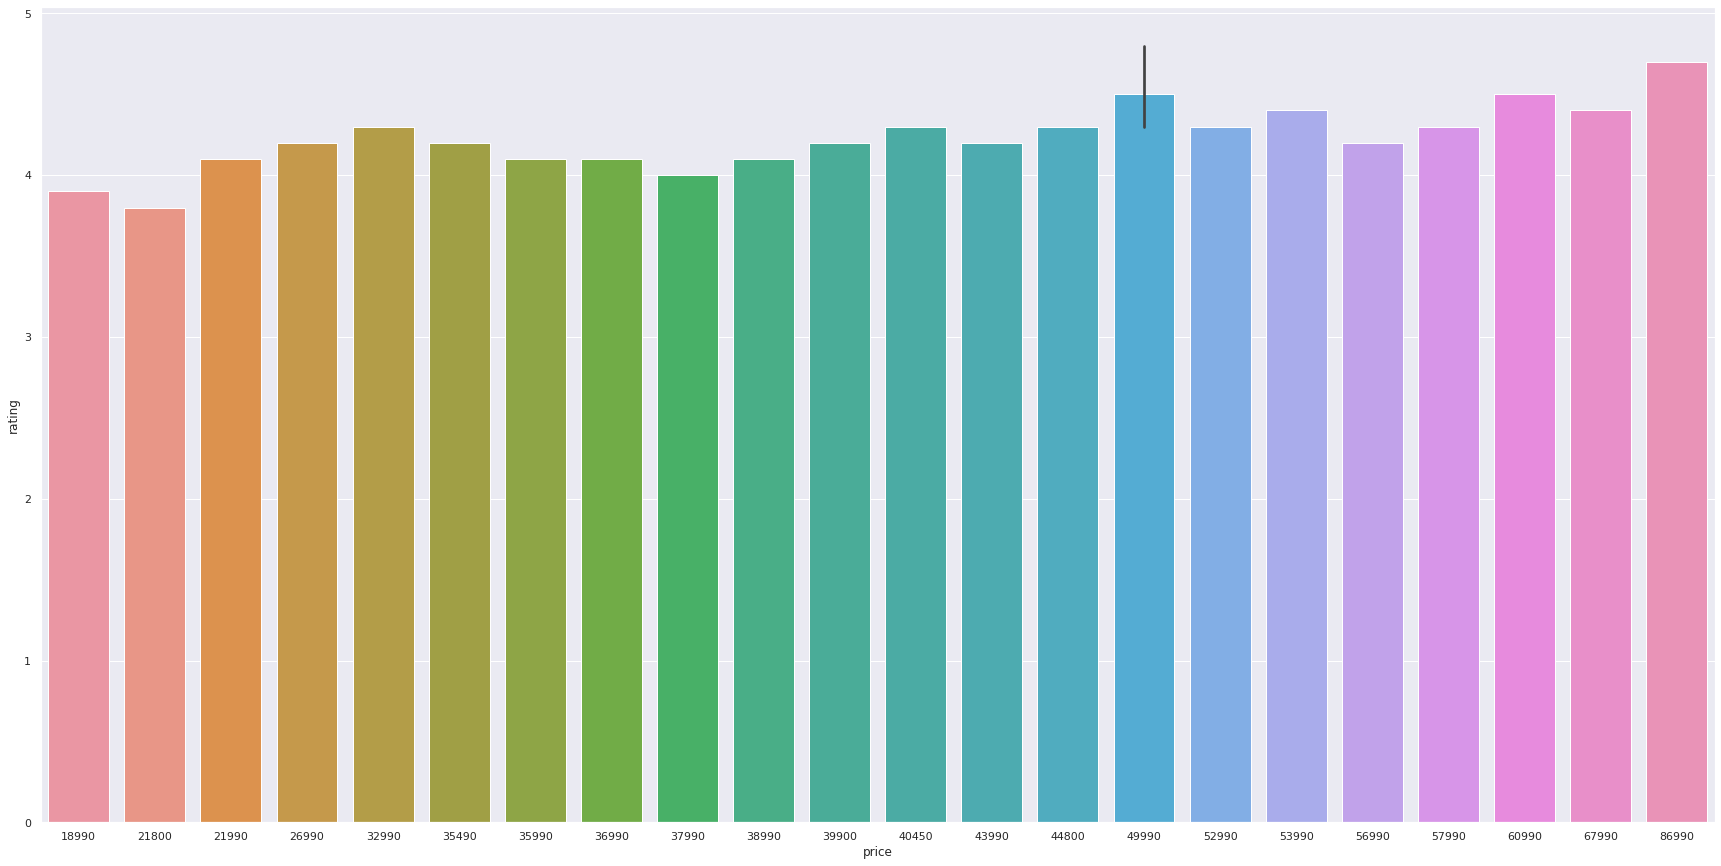

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline


sns.set(rc={'figure.figsize':(30,15)})
sns.barplot(laptop_df['price'], laptop_df['rating'])

Text(0.5, 1.0, 'Calificación vs Precio')

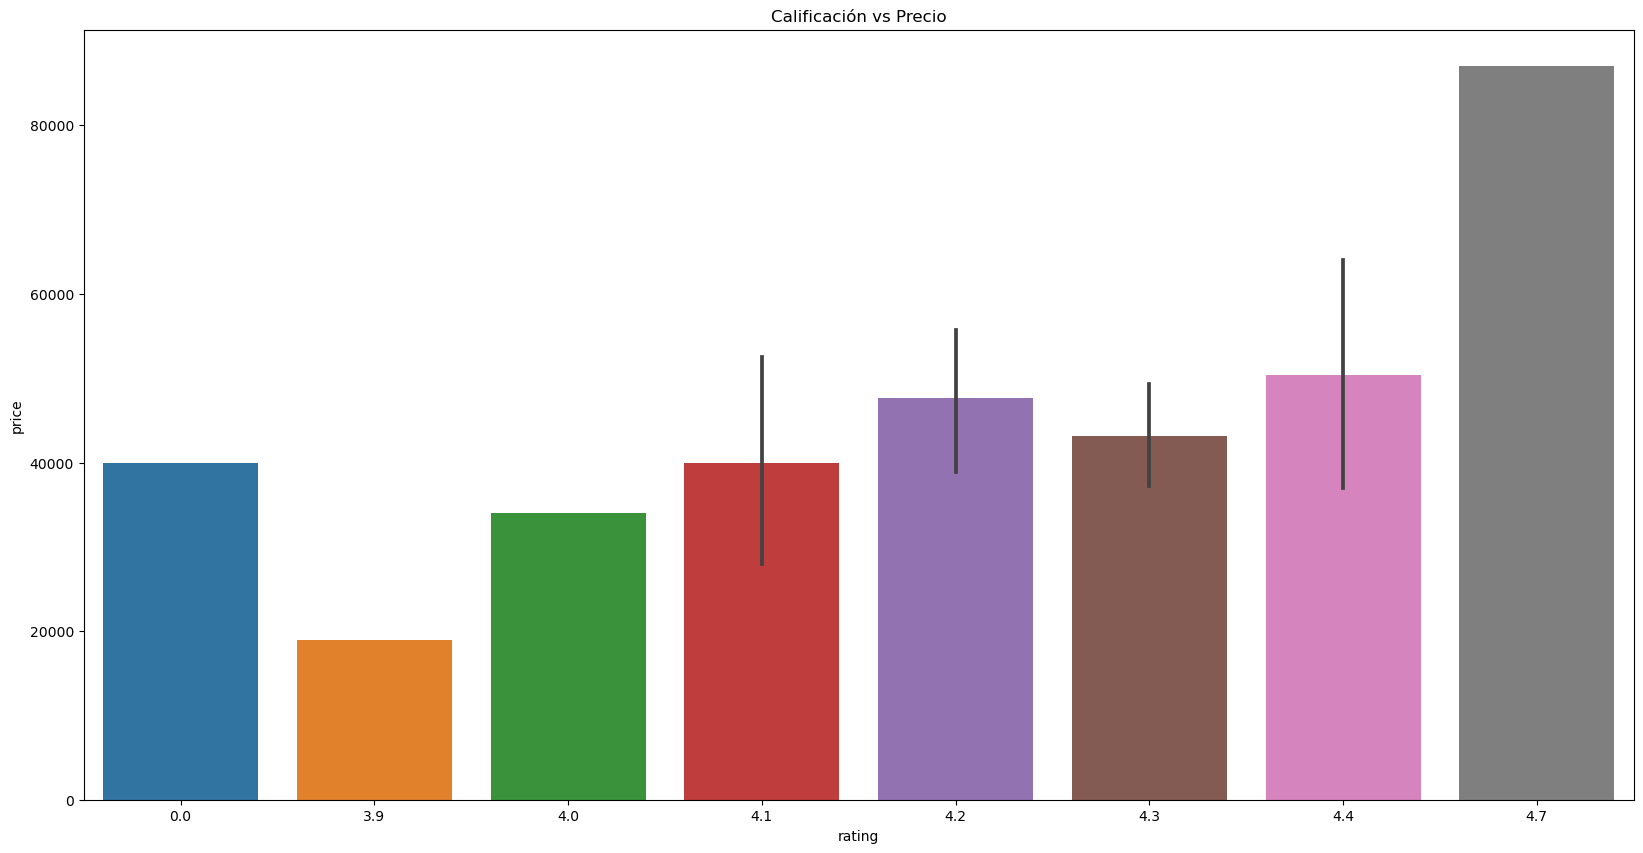

In [ ]:
#<COMPLETA>

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Calificacion vs precio')

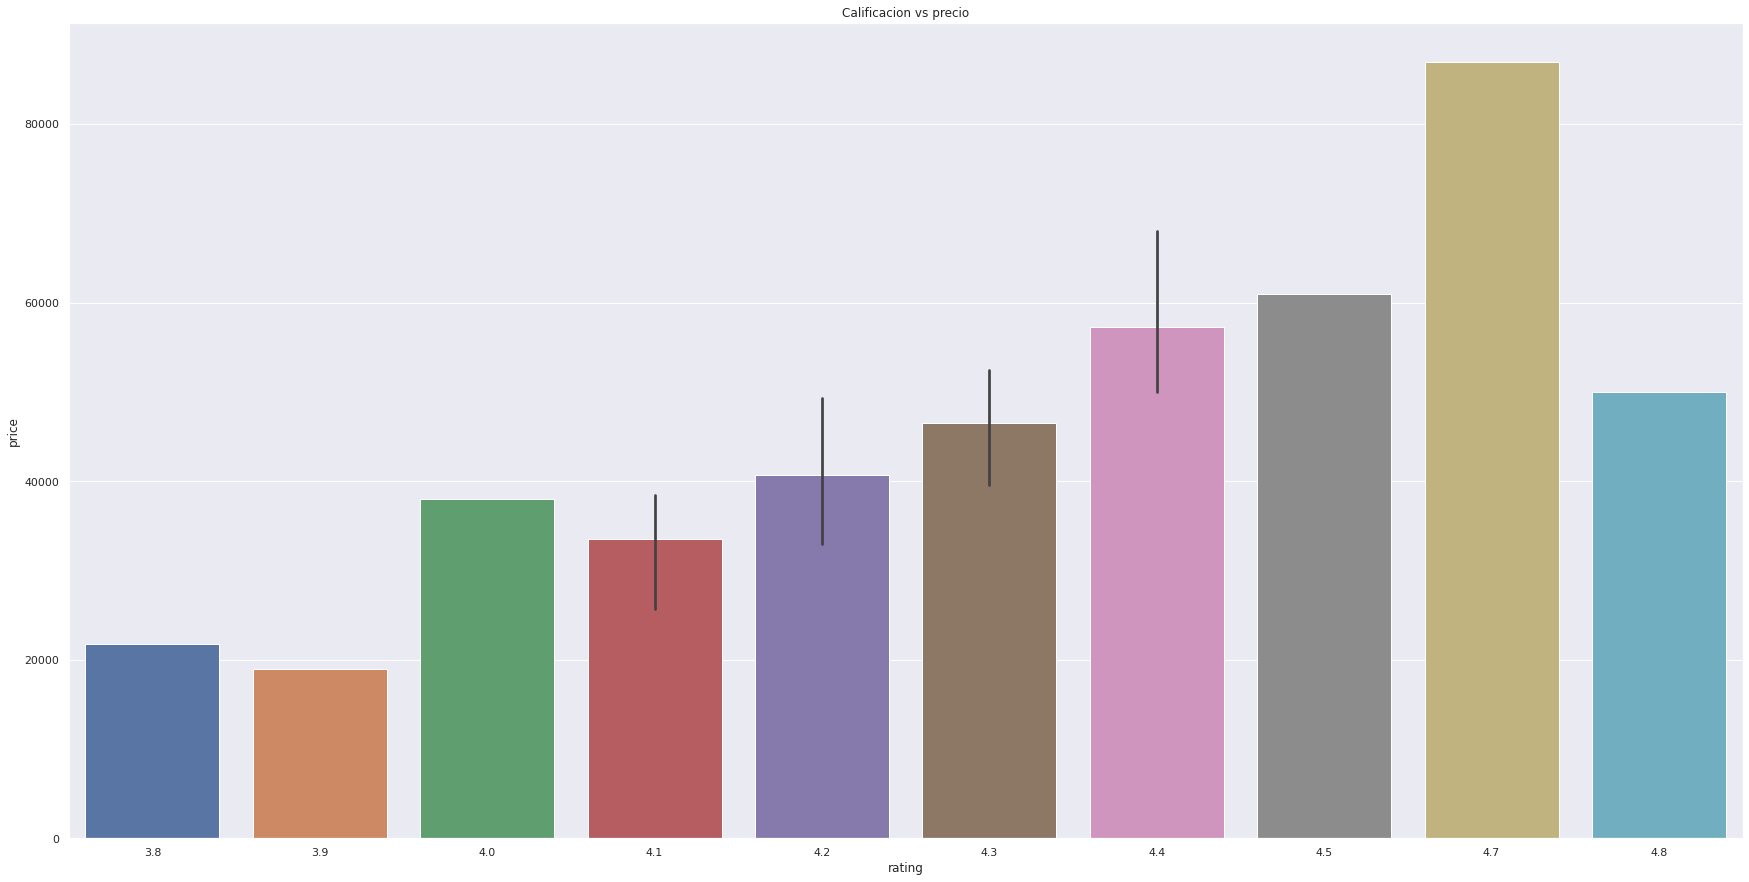

In [ ]:
#sns.set(rc={'figure.figsize':(30,15)})
sns.barplot(laptop_df['rating'], laptop_df['price']).set_title("Calificacion vs precio")


Podemos concluir a partir de aquí que los productos con precios más altos tienen calificaciones más altas hasta cierto punto.

Text(0.5, 1.0, 'Box plot')

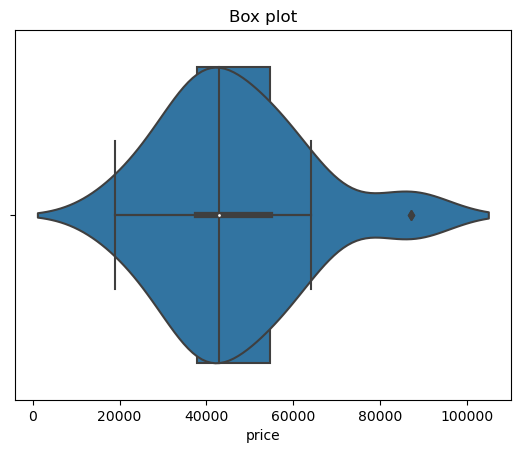

In [ ]:
#<COMPLETA>

<AxesSubplot:xlabel='price'>

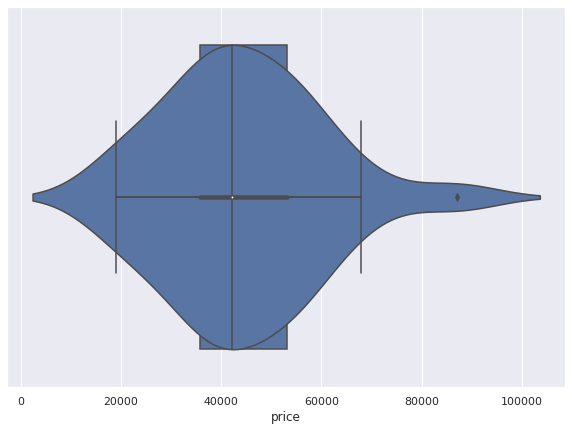

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.violinplot(x=laptop_df['price'])
sns.boxplot(x=laptop_df['price'])

## ¿Les ha salido algún discordante visual a ustedes?

In [ ]:
#<COMPLETA>

,rating,price,model,RAM,Storage,System,Other_Info
3,4.7,86990.0,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
10,4.4,63990.0,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,8 GB,512 GB SSD,Windows 11 Ho...,NaN
13,4.7,86990.0,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN93HN/A
23,4.2,61400.0,HP 14s Intel Core i5 12th Gen,16 GB,512 GB SSD,Windows 11 Home,14s - dy5005TU Thin and Light Lapto...


### ¿Para ustedes, cuáles fueron las computadoras más caras?

In [ ]:
laptop_df.sort_values(["price"],ascending=False)

,price,rating,model,RAM,Storage,OS,Model
17,86990,4.7,APPLE 2020 Macbook Air M1,8 GB,256 GB SSD,Mac OS Big Sur,MGN63HN/A
23,67990,4.4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 7...,8 GB,512 GB SSD,Windows 11 Ho...,NaN
11,60990,4.5,Lenovo Lenovo IdeaPad Slim 3 Intel Core i5 11t...,16 GB,512 GB SSD,Windows 11 Home,15ITL6 Thin a...
15,57990,4.3,Lenovo IdeaPad Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
22,56990,4.2,HP 15s Intel Core i5 12th Gen,8 GB,512 GB SSD,Windows 11 Home,15s-fq5111TU Thin and Light Laptop
19,53990,4.4,ASUS TUF Gaming A17 with 90Whr Battery Ryzen 5...,8 GB,512 GB SSD,Windows 11 Ho...,NaN
20,52990,4.3,HP Intel Core i5 11th Gen,8 GB,512 GB SSD,Windows 11 Home,15s- fr4000TU Thin and Light Laptop
2,49990,4.4,ASUS TUF Gaming F15 Core i5 10th Gen,8 GB,512 GB SSD,Windows 11 Home/4 GB Graphics/NVIDIA GeForce G...,NaN
9,49990,4.3,HP Ryzen 5 Hexa Core 5500U,16 GB,512 GB SSD,Windows 11 Home,15s- eq2182AU Thin and Light Laptop
16,49990,4.8,ASUS Core i5 11th Gen,8 GB,512 GB SSD,Windows 10 Home/2 GB Graphics,K513EP-BQ1092T Thin and Light ...
